In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset, load_metric

In [2]:
os.chdir('../..')

## Load prediction files

In [3]:
prediction_file_dict = {
    0: 'data/raw/albert_checkpoint_predictions/checkpoint-815/eval_predictions.json',
    1: 'data/raw/albert_checkpoint_predictions/checkpoint-1630/eval_predictions.json',
    2: 'data/raw/albert_checkpoint_predictions/checkpoint-2445/eval_predictions.json',
    3: 'data/raw/albert_checkpoint_predictions/checkpoint-3260/eval_predictions.json',
    4: 'data/raw/albert_checkpoint_predictions/checkpoint-4075/eval_predictions.json',
    5: 'data/raw/albert_checkpoint_predictions/checkpoint-4890/eval_predictions.json',
    6: 'data/raw/albert_checkpoint_predictions/checkpoint-5705/eval_predictions.json',
    7: 'data/raw/albert_checkpoint_predictions/checkpoint-6520/eval_predictions.json',
    8: 'data/raw/albert_checkpoint_predictions/checkpoint-7335/eval_predictions.json',
    9: 'data/raw/albert_checkpoint_predictions/checkpoint-final/eval_predictions.json',
}

In [4]:
predictions_df = pd.DataFrame()

for checkpoint, fp in prediction_file_dict.items():
    eval_predictions_df = pd.read_json(fp, orient='index')
    eval_predictions_df.reset_index(inplace=True)
    eval_predictions_df.rename(columns={'index': 'id', 0: "prediction_text"}, inplace=True)
    eval_predictions_df['checkpoint'] = checkpoint
    
    predictions_df = predictions_df.append(eval_predictions_df)

In [5]:
print(predictions_df.shape)
predictions_df.head()

(118730, 3)


,id,prediction_text,checkpoint
0,56ddde6b9a695914005b9628,France,0
1,56ddde6b9a695914005b9629,10th and 11th centuries,0
2,56ddde6b9a695914005b962a,"Denmark, Iceland and Norway",0
3,56ddde6b9a695914005b962b,Rollo,0
4,56ddde6b9a695914005b962c,10th century,0


## Load labels

In [6]:
squad_v2_val = load_dataset('squad_v2', split='validation')

Reusing dataset squad_v2 (/Users/stevengeorge/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/ba48bc29b974701e9ba8d80ac94f3e3df924aba41b764dcf9851debea7c672e4)


In [7]:
squad_v2_val_df = pd.DataFrame(squad_v2_val)
print(squad_v2_val_df.shape)
squad_v2_val_df.head()

(11873, 5)


,answers,context,id,question,title
0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9628,In what country is Normandy located?,Normans
1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9629,When were the Normans in Normandy?,Normans
2,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962a,From which countries did the Norse originate?,Normans
3,"{'answer_start': [308, 308, 308, 308], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962b,Who was the Norse leader?,Normans
4,"{'answer_start': [671, 649, 671, 671], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,Normans


## Merge with categories

In [8]:
squad2_categories = pd.read_csv('data/processed/squad2_dev_simple_categories.csv')
print(squad2_categories.shape)
squad2_categories.head()

(11873, 6)


,id,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable
0,56ddde6b9a695914005b9628,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
1,56ddde6b9a695914005b9629,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
2,56ddde6b9a695914005b962a,which,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
3,56ddde6b9a695914005b962b,was,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
4,56ddde6b9a695914005b962c,what,"(165.106, 947.8]","(48.2, 85.4]","(-0.157, 39.333]",0


In [9]:
combined = predictions_df.merge(squad_v2_val_df, on='id', how='inner')

assert combined.shape[0] == predictions_df.shape[0]

combined.head()

,id,prediction_text,checkpoint,answers,context,question,title
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans
2,56ddde6b9a695914005b9628,France,2,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans
3,56ddde6b9a695914005b9628,France,3,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans
4,56ddde6b9a695914005b9628,France,4,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans


In [10]:
combined = combined.merge(squad2_categories, on='id', how='inner')

assert combined.shape[0] == predictions_df.shape[0]

combined.head()

,id,prediction_text,checkpoint,answers,context,question,title,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
2,56ddde6b9a695914005b9628,France,2,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
3,56ddde6b9a695914005b9628,France,3,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
4,56ddde6b9a695914005b9628,France,4,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0


Get number of examples seen for each checkpoint

In [11]:
step_schedule = [815, 1630, 2445, 3260, 4075, 4890, 5705, 6520, 7335, 8144]

In [12]:
checkpoint_to_examples = dict(zip(range(10), [48 * step for step in step_schedule]))
checkpoint_to_examples

{0: 39120,
 1: 78240,
 2: 117360,
 3: 156480,
 4: 195600,
 5: 234720,
 6: 273840,
 7: 312960,
 8: 352080,
 9: 390912}

In [13]:
combined['num_examples'] = combined['checkpoint'].map(checkpoint_to_examples)

## Evaluation function

In [14]:
SQUAD_V2_METRIC = load_metric("squad_v2")

In [15]:
SQUAD_V2_METRIC

Metric(name: "squad_v2", features: {'predictions': {'id': Value(dtype='string', id=None), 'prediction_text': Value(dtype='string', id=None), 'no_answer_probability': Value(dtype='float32', id=None)}, 'references': {'id': Value(dtype='string', id=None), 'answers': Sequence(feature={'text': Value(dtype='string', id=None), 'answer_start': Value(dtype='int32', id=None)}, length=-1, id=None)}}, usage: """
Computes SQuAD v2 scores (F1 and EM).
Args:
    predictions: List of triple for question-answers to score with the following elements:
        - the question-answer 'id' field as given in the references (see below)
        - the text of the answer
        - the probability that the question has no answer
    references: List of question-answers dictionaries with the following key-values:
            - 'id': id of the question-answer pair (see above),
            - 'answers': a list of Dict {'text': text of the answer as a string}
    no_answer_threshold: float
        Probability threshold

In [16]:
def squad2_evaluation(id_list, prediction_text_list, answers_list):
    predictions = [
        {
            'prediction_text': prediction_text, 
            'id': _id, 
            'no_answer_probability': 0.0  # Same as https://github.com/huggingface/transformers/blob/master/examples/pytorch/question-answering/run_qa.py#L532
        } for 
        _id, prediction_text in zip(id_list, prediction_text_list)
    ]
    
    references = [
        {
            'id': _id, 
            'answers': answers
        } for 
        _id, answers in zip(id_list, answers_list)
    ]
    
    metrics = SQUAD_V2_METRIC.compute(predictions=predictions, references=references)
    
    return metrics

Check:

In [17]:
squad2_evaluation(
    id_list=list(combined[combined['checkpoint'] == 0]['id']), 
    prediction_text_list=list(combined[combined['checkpoint'] == 0]['prediction_text']), 
    answers_list=list(combined[combined['checkpoint'] == 0]['answers'])
)

{'exact': 70.61399814705635,
 'f1': 74.62067830849753,
 'total': 11873,
 'HasAns_exact': 75.74224021592443,
 'HasAns_f1': 83.76709068097001,
 'HasAns_total': 5928,
 'NoAns_exact': 65.5004205214466,
 'NoAns_f1': 65.5004205214466,
 'NoAns_total': 5945,
 'best_exact': 70.62242061820939,
 'best_exact_thresh': 0.0,
 'best_f1': 74.62910077965057,
 'best_f1_thresh': 0.0}

In [18]:
squad2_evaluation(
    id_list=list(combined[combined['checkpoint'] == 1]['id']), 
    prediction_text_list=list(combined[combined['checkpoint'] == 1]['prediction_text']), 
    answers_list=list(combined[combined['checkpoint'] == 1]['answers'])
)

{'exact': 77.29301777141413,
 'f1': 80.99899721919779,
 'total': 11873,
 'HasAns_exact': 78.91363022941971,
 'HasAns_f1': 86.33621693379483,
 'HasAns_total': 5928,
 'NoAns_exact': 75.67703952901599,
 'NoAns_f1': 75.67703952901599,
 'NoAns_total': 5945,
 'best_exact': 77.29301777141413,
 'best_exact_thresh': 0.0,
 'best_f1': 80.99899721919768,
 'best_f1_thresh': 0.0}

Both match values in `eval_results.json`

## Plots

### WWWWWWH questions

In [19]:
combined.head()

,id,prediction_text,checkpoint,answers,context,question,title,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable,num_examples
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,39120
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,78240
2,56ddde6b9a695914005b9628,France,2,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,117360
3,56ddde6b9a695914005b9628,France,3,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,156480
4,56ddde6b9a695914005b9628,France,4,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,195600


In [20]:
combined['w8h_label'].unique()

array(['what', 'when', 'which', 'was', 'who', 'where', 'how', 'other',
       'whose', 'why', 'whom'], dtype=object)

In [21]:
combined['w8h_label'].nunique()

11

In [22]:
full_metrics_df = pd.DataFrame()

for num_examples in combined['num_examples'].unique():
    for label in combined['w8h_label'].unique():
        
        combined_subset = combined.copy()[
            (combined['w8h_label'] == label) & 
            (combined['num_examples'] == num_examples)
        ]
        
        id_list = list(combined_subset['id'])
        prediction_text_list = list(combined_subset['prediction_text'])
        answers_list = list(combined_subset['answers'])

        metrics = squad2_evaluation(
            id_list=id_list, 
            prediction_text_list=prediction_text_list, 
            answers_list=answers_list
        )

        metrics_df = pd.DataFrame(metrics, index=[0])
        metrics_df['w8h_label'] = label
        metrics_df['num_examples'] = num_examples
        
        full_metrics_df = full_metrics_df.append(metrics_df, ignore_index=True)

In [23]:
print(full_metrics_df.shape)
full_metrics_df.head()

(110, 15)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,NoAns_exact,NoAns_f1,NoAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,w8h_label,num_examples
0,71.612695,75.491245,6207,75.073602,82.948694,3057,68.253968,68.253968,3150,71.628806,0.0,75.507356,0.0,what,39120
1,77.033493,80.023383,627,81.333333,87.582204,300,73.088685,73.088685,327,77.033493,0.0,80.023383,0.0,when,39120
2,72.166998,76.497207,503,78.220859,84.902133,326,61.016949,61.016949,177,72.962227,0.0,77.093629,0.0,which,39120
3,71.597967,74.835108,1771,79.700115,86.312546,867,63.827434,63.827434,904,71.710898,0.0,74.948039,0.0,was,39120
4,68.550369,70.766282,814,82.795699,87.644499,372,56.561086,56.561086,442,68.796069,0.0,71.011982,0.0,who,39120


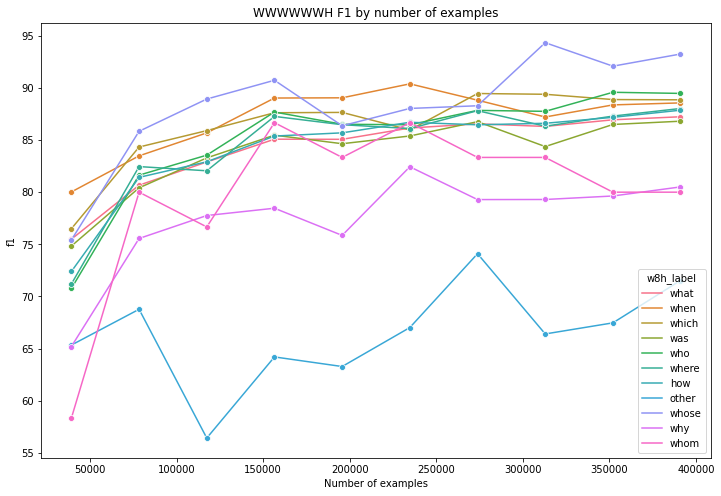

In [24]:
plt.figure(figsize=(12, 8))
plt.title('WWWWWWH F1 by number of examples')
plt.xlabel('Number of examples')
sns.lineplot(data=full_metrics_df, y='f1', x='num_examples', hue='w8h_label', marker='o')
plt.show()

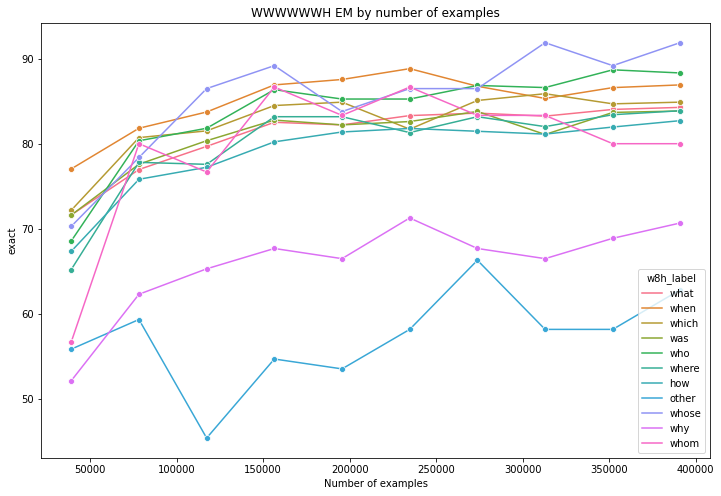

In [25]:
plt.figure(figsize=(12, 8))
plt.title('WWWWWWH EM by number of examples')
plt.xlabel('Number of examples')
sns.lineplot(data=full_metrics_df, y='exact', x='num_examples', hue='w8h_label', marker='o')
plt.show()

### Answerable/Unanswerable

In [26]:
combined.head()

,id,prediction_text,checkpoint,answers,context,question,title,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable,num_examples
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,39120
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,78240
2,56ddde6b9a695914005b9628,France,2,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,117360
3,56ddde6b9a695914005b9628,France,3,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,156480
4,56ddde6b9a695914005b9628,France,4,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,195600


In [27]:
combined['unanswerable'].unique()

array([0, 1])

In [28]:
full_metrics_df = pd.DataFrame()

for num_examples in combined['num_examples'].unique():
    for label in combined['unanswerable'].unique():
        
        combined_subset = combined.copy()[
            (combined['unanswerable'] == label) & 
            (combined['num_examples'] == num_examples)
        ]
        
        id_list = list(combined_subset['id'])
        prediction_text_list = list(combined_subset['prediction_text'])
        answers_list = list(combined_subset['answers'])

        metrics = squad2_evaluation(
            id_list=id_list, 
            prediction_text_list=prediction_text_list, 
            answers_list=answers_list
        )

        metrics_df = pd.DataFrame(metrics, index=[0])
        metrics_df['unanswerable'] = label
        metrics_df['num_examples'] = num_examples
        
        full_metrics_df = full_metrics_df.append(metrics_df, ignore_index=True)

In [29]:
print(full_metrics_df.shape)
full_metrics_df.head()

(20, 15)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,unanswerable,num_examples,NoAns_exact,NoAns_f1,NoAns_total
0,75.742240,83.767091,5928,75.742240,83.767091,5928.0,75.742240,0.0,83.767091,0.0,0,39120,NaN,NaN,NaN
1,65.500421,65.500421,5945,NaN,NaN,NaN,100.000000,0.0,100.000000,0.0,1,39120,65.500421,65.500421,5945.0
2,78.913630,86.336217,5928,78.913630,86.336217,5928.0,78.913630,0.0,86.336217,0.0,0,78240,NaN,NaN,NaN
3,75.677040,75.677040,5945,NaN,NaN,NaN,100.000000,0.0,100.000000,0.0,1,78240,75.677040,75.677040,5945.0
4,79.352227,86.415692,5928,79.352227,86.415692,5928.0,79.352227,0.0,86.415692,0.0,0,117360,NaN,NaN,NaN


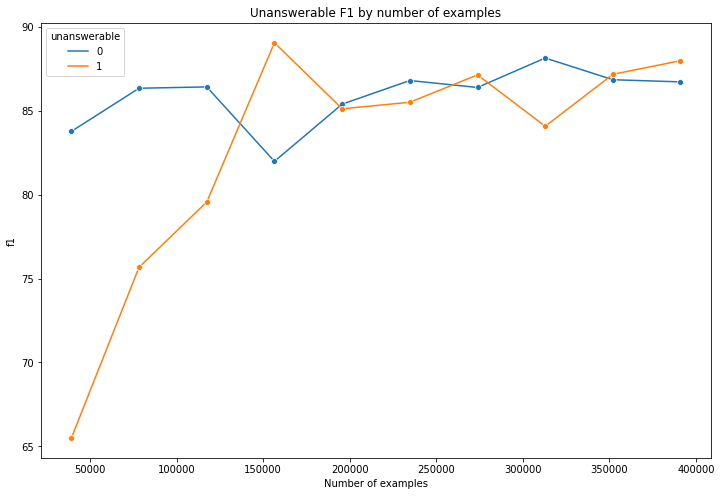

In [30]:
plt.figure(figsize=(12, 8))
plt.title('Unanswerable F1 by number of examples')
plt.xlabel('Number of examples')
sns.lineplot(data=full_metrics_df, y='f1', x='num_examples', hue='unanswerable', marker='o')
plt.show()

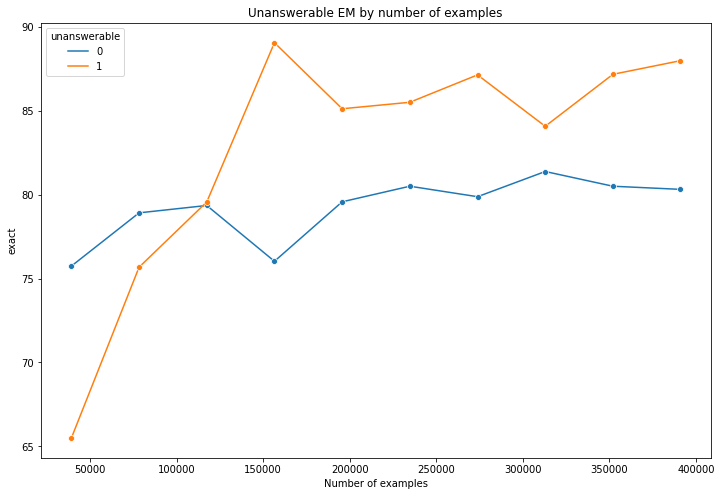

In [31]:
plt.figure(figsize=(12, 8))
plt.title('Unanswerable EM by number of examples')
plt.xlabel('Number of examples')
sns.lineplot(data=full_metrics_df, y='exact', x='num_examples', hue='unanswerable', marker='o')
plt.show()

### Length metrics

#### i. Context length

In [32]:
combined.head()

,id,prediction_text,checkpoint,answers,context,question,title,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable,num_examples
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,39120
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,78240
2,56ddde6b9a695914005b9628,France,2,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,117360
3,56ddde6b9a695914005b9628,France,3,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,156480
4,56ddde6b9a695914005b9628,France,4,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,195600


In [33]:
combined['context_length_bin'].unique()

array(['(165.106, 947.8]', '(947.8, 1726.6]', '(1726.6, 2505.4]',
       '(2505.4, 3284.2]', '(3284.2, 4063.0]'], dtype=object)

In [34]:
full_metrics_df = pd.DataFrame()

for num_examples in combined['num_examples'].unique():
    for label in combined['context_length_bin'].unique():
        
        combined_subset = combined.copy()[
            (combined['context_length_bin'] == label) & 
            (combined['num_examples'] == num_examples)
        ]
        
        id_list = list(combined_subset['id'])
        prediction_text_list = list(combined_subset['prediction_text'])
        answers_list = list(combined_subset['answers'])

        metrics = squad2_evaluation(
            id_list=id_list, 
            prediction_text_list=prediction_text_list, 
            answers_list=answers_list
        )

        metrics_df = pd.DataFrame(metrics, index=[0])
        metrics_df['context_length_bin'] = label
        metrics_df['num_examples'] = num_examples
        
        full_metrics_df = full_metrics_df.append(metrics_df, ignore_index=True)

In [35]:
print(full_metrics_df.shape)
full_metrics_df.head()

(50, 15)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,NoAns_exact,NoAns_f1,NoAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,context_length_bin,num_examples
0,70.446200,74.384060,8987,75.637014,83.547061,4474,65.300244,65.300244,4513,70.457327,0.0,74.395188,0.0,"(165.106, 947.8]",39120
1,71.373308,75.461564,2585,76.311728,84.466160,1296,66.408068,66.408068,1289,71.450677,0.0,75.538934,0.0,"(947.8, 1726.6]",39120
2,71.615721,77.200428,229,74.193548,84.507243,124,68.571429,68.571429,105,71.615721,0.0,77.200428,0.0,"(1726.6, 2505.4]",39120
3,62.264151,65.906672,53,76.000000,83.722145,25,50.000000,50.000000,28,81.132075,0.0,83.113208,0.0,"(2505.4, 3284.2]",39120
4,57.894737,65.350877,19,66.666667,82.407407,9,50.000000,50.000000,10,73.684211,0.0,81.140351,0.0,"(3284.2, 4063.0]",39120


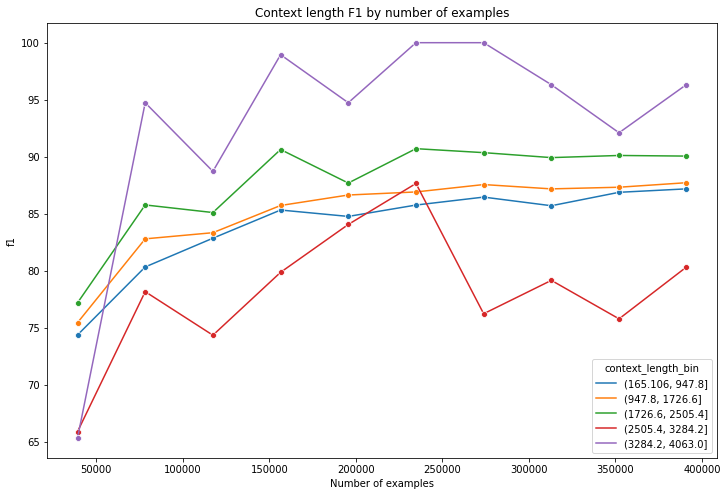

In [36]:
plt.figure(figsize=(12, 8))
plt.title('Context length F1 by number of examples')
plt.xlabel('Number of examples')
sns.lineplot(data=full_metrics_df, y='f1', x='num_examples', hue='context_length_bin', marker='o')
plt.show()

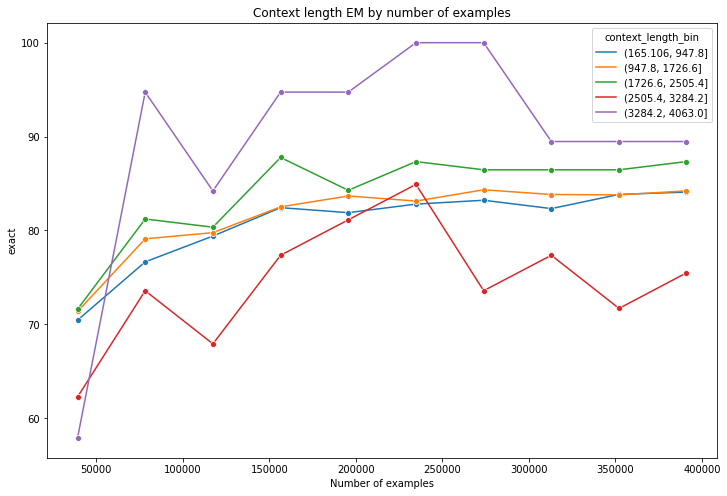

In [37]:
plt.figure(figsize=(12, 8))
plt.title('Context length EM by number of examples')
plt.xlabel('Number of examples')
sns.lineplot(data=full_metrics_df, y='exact', x='num_examples', hue='context_length_bin', marker='o')
plt.show()

#### ii. Question length

In [38]:
combined.head()

,id,prediction_text,checkpoint,answers,context,question,title,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable,num_examples
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,39120
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,78240
2,56ddde6b9a695914005b9628,France,2,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,117360
3,56ddde6b9a695914005b9628,France,3,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,156480
4,56ddde6b9a695914005b9628,France,4,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,195600


In [39]:
combined['question_length_bin'].unique()

array(['(10.814, 48.2]', '(48.2, 85.4]', '(122.6, 159.8]',
       '(85.4, 122.6]', '(159.8, 197.0]'], dtype=object)

In [40]:
full_metrics_df = pd.DataFrame()

for num_examples in combined['num_examples'].unique():
    for label in combined['question_length_bin'].unique():
        
        combined_subset = combined.copy()[
            (combined['question_length_bin'] == label) & 
            (combined['num_examples'] == num_examples)
        ]
        
        id_list = list(combined_subset['id'])
        prediction_text_list = list(combined_subset['prediction_text'])
        answers_list = list(combined_subset['answers'])

        metrics = squad2_evaluation(
            id_list=id_list, 
            prediction_text_list=prediction_text_list, 
            answers_list=answers_list
        )

        metrics_df = pd.DataFrame(metrics, index=[0])
        metrics_df['question_length_bin'] = label
        metrics_df['num_examples'] = num_examples
        
        full_metrics_df = full_metrics_df.append(metrics_df, ignore_index=True)

In [41]:
print(full_metrics_df.shape)
full_metrics_df.head()

(50, 15)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,NoAns_exact,NoAns_f1,NoAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,question_length_bin,num_examples
0,69.252504,73.310448,3893,74.223245,83.312759,1738,65.243619,65.243619,2155,69.252504,0.0,73.310448,0.0,"(10.814, 48.2]",39120
1,70.955662,74.867616,6676,75.763868,83.511184,3371,66.051437,66.051437,3305,70.970641,0.0,74.882595,0.0,"(48.2, 85.4]",39120
2,73.275862,79.296910,116,77.500000,86.230519,80,63.888889,63.888889,36,73.275862,0.0,79.296910,0.0,"(122.6, 159.8]",39120
3,72.819644,77.018708,1181,78.882834,85.639093,734,62.863535,62.863535,447,72.819644,0.0,77.018708,0.0,"(85.4, 122.6]",39120
4,85.714286,85.714286,7,100.000000,100.000000,5,50.000000,50.000000,2,100.000000,0.0,100.000000,0.0,"(159.8, 197.0]",39120


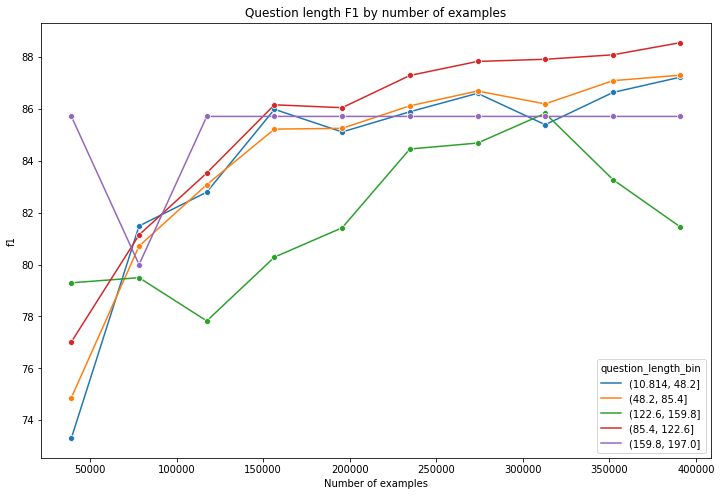

In [42]:
plt.figure(figsize=(12, 8))
plt.title('Question length F1 by number of examples')
plt.xlabel('Number of examples')
sns.lineplot(data=full_metrics_df, y='f1', x='num_examples', hue='question_length_bin', marker='o')
plt.show()

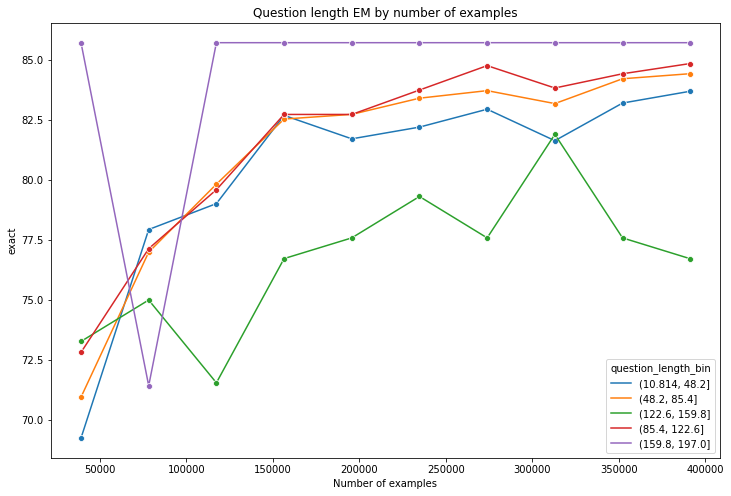

In [43]:
plt.figure(figsize=(12, 8))
plt.title('Question length EM by number of examples')
plt.xlabel('Number of examples')
sns.lineplot(data=full_metrics_df, y='exact', x='num_examples', hue='question_length_bin', marker='o')
plt.show()

#### iii. Answer length

In [44]:
combined.head()

,id,prediction_text,checkpoint,answers,context,question,title,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable,num_examples
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,39120
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,78240
2,56ddde6b9a695914005b9628,France,2,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,117360
3,56ddde6b9a695914005b9628,France,3,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,156480
4,56ddde6b9a695914005b9628,France,4,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0,195600


In [45]:
combined['answer_mean_length_bin'].unique()

array(['(-0.157, 39.333]', '0 (unanswerable)', '(39.333, 78.667]',
       '(78.667, 118.0]', '(118.0, 157.333]'], dtype=object)

In [46]:
full_metrics_df = pd.DataFrame()

for num_examples in combined['num_examples'].unique():
    for label in combined['answer_mean_length_bin'].unique():
        
        combined_subset = combined.copy()[
            (combined['answer_mean_length_bin'] == label) & 
            (combined['num_examples'] == num_examples)
        ]
        
        id_list = list(combined_subset['id'])
        prediction_text_list = list(combined_subset['prediction_text'])
        answers_list = list(combined_subset['answers'])

        metrics = squad2_evaluation(
            id_list=id_list, 
            prediction_text_list=prediction_text_list, 
            answers_list=answers_list
        )

        metrics_df = pd.DataFrame(metrics, index=[0])
        metrics_df['answer_mean_length_bin'] = label
        metrics_df['num_examples'] = num_examples
        
        full_metrics_df = full_metrics_df.append(metrics_df, ignore_index=True)

In [47]:
print(full_metrics_df.shape)
full_metrics_df.head()

(50, 15)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,answer_mean_length_bin,num_examples,NoAns_exact,NoAns_f1,NoAns_total
0,79.120670,85.553337,5254,79.12067,85.553337,5254.0,79.12067,0.0,85.553337,0.0,"(-0.157, 39.333]",39120,NaN,NaN,NaN
1,65.500421,65.500421,5945,NaN,NaN,NaN,100.00000,0.0,100.000000,0.0,0 (unanswerable),39120,65.500421,65.500421,5945.0
2,51.520270,70.796177,592,51.52027,70.796177,592.0,51.52027,0.0,70.796177,0.0,"(39.333, 78.667]",39120,NaN,NaN,NaN
3,37.500000,64.652925,72,37.50000,64.652925,72.0,37.50000,0.0,64.652925,0.0,"(78.667, 118.0]",39120,NaN,NaN,NaN
4,10.000000,50.773561,10,10.00000,50.773561,10.0,10.00000,0.0,50.773561,0.0,"(118.0, 157.333]",39120,NaN,NaN,NaN


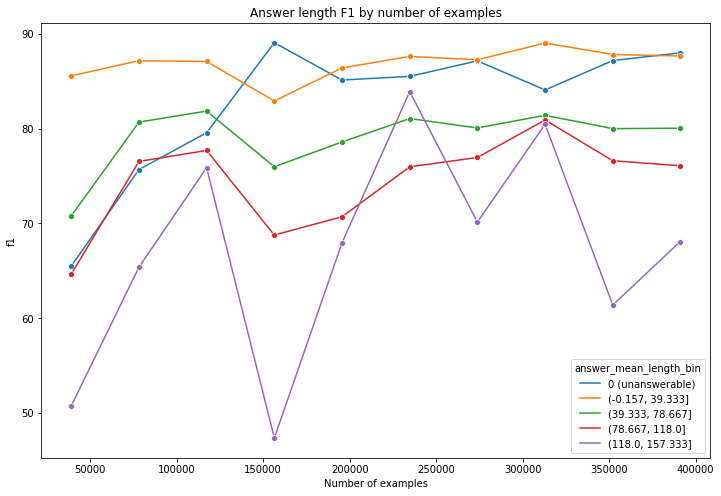

In [48]:
plt.figure(figsize=(12, 8))
plt.title('Answer length F1 by number of examples')
plt.xlabel('Number of examples')
sns.lineplot(
    data=full_metrics_df, y='f1', x='num_examples', hue='answer_mean_length_bin', marker='o', 
    hue_order=['0 (unanswerable)', '(-0.157, 39.333]', '(39.333, 78.667]', '(78.667, 118.0]', '(118.0, 157.333]']
)
plt.show()

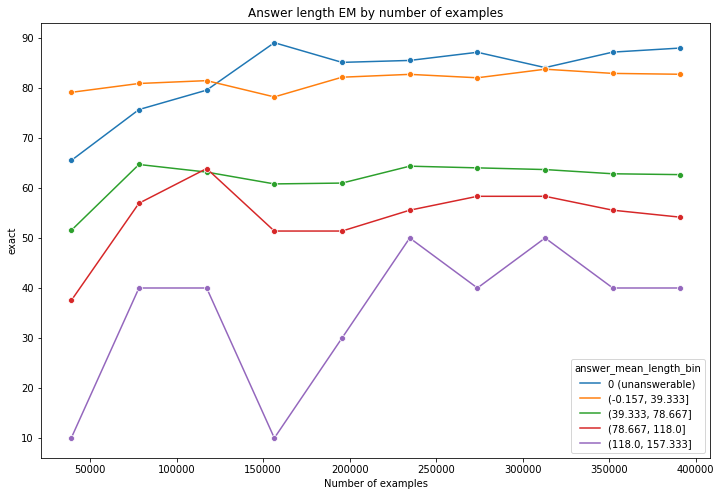

In [49]:
plt.figure(figsize=(12, 8))
plt.title('Answer length EM by number of examples')
plt.xlabel('Number of examples')
sns.lineplot(
    data=full_metrics_df, y='exact', x='num_examples', hue='answer_mean_length_bin', marker='o',
    hue_order=['0 (unanswerable)', '(-0.157, 39.333]', '(39.333, 78.667]', '(78.667, 118.0]', '(118.0, 157.333]']
)
plt.show()